In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
# используем выборку, связанную с коронавирусом
data = pd.read_csv('dataset.csv', sep=",")

In [3]:
data.shape

(215, 15)

In [4]:
data.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [5]:
# проверим есть ли пропущенные значения
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [6]:
#удалим полностью пустые колонки
dat = data.dropna(axis=1, how='all')
dat.shape

(215, 15)

In [7]:
dat.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [8]:
# Удаление колонок, содержащих пустые значения
data_new_1 = dat.dropna(axis=1, how='any')
(dat.shape, data_new_1.shape)

((215, 15), (215, 14))

In [9]:
# Удаление строк, содержащих пустые значения
data_new_2 = dat.dropna(axis=0, how='any')
(dat.shape, data_new_2.shape)

((215, 15), (148, 15))

In [10]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
total_count = dat.shape[0]
for col in dat.columns:
    # Количество пустых значений 
    temp_null_count = dat[dat[col].isnull()].shape[0]
    dt = str(dat[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка salary. Тип данных float64. Количество пустых значений 67, 31.16%.


In [11]:
# Фильтр по колонкам с пропущенными значениями
data_num = dat[num_cols]
data_num

,salary
0,270000.0
1,200000.0
2,250000.0
3,NaN
4,425000.0
...,...
210,400000.0
211,275000.0
212,295000.0
213,204000.0


In [12]:
dat['salary'].unique()

array([270000., 200000., 250000.,     nan, 425000., 252000., 231000.,
       260000., 218000., 300000., 236000., 265000., 393000., 360000.,
       240000., 350000., 278000., 320000., 411000., 287000., 204000.,
       450000., 216000., 220000., 268000., 275000., 336000., 230000.,
       500000., 400000., 210000., 420000., 380000., 280000., 276000.,
       940000., 225000., 233000., 690000., 340000., 255000., 285000.,
       290000., 650000., 264000., 295000.])

/usr/local/anaconda3/envs/ml/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/anaconda3/envs/ml/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


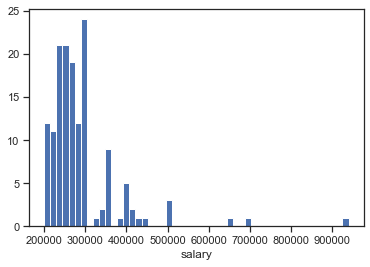

In [13]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(dat[col], 50)
    plt.xlabel(col)
    plt.show()

In [14]:
# Фильтр по пустым значениям поля salary 
dat[dat['salary'].isnull()]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN
201,202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,NaN
206,207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN
208,209,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,NaN


In [15]:
# Запоминаем индексы строк с пустыми значениями
flt_index = dat[dat['salary'].isnull()].index
flt_index

Int64Index([  3,   5,   6,   9,  12,  14,  17,  18,  25,  29,  31,  34,  36,
             41,  42,  45,  46,  49,  51,  52,  63,  65,  68,  75,  79,  82,
             87,  91,  93,  97,  99, 100, 105, 106, 109, 111, 120, 130, 136,
            141, 144, 149, 155, 158, 159, 161, 165, 167, 168, 169, 170, 173,
            175, 179, 181, 182, 184, 186, 188, 189, 190, 194, 198, 201, 206,
            208, 214],
           dtype='int64')

In [16]:
data_salary = data_num[['salary']]
data_salary.head()

,salary
0,270000.0
1,200000.0
2,250000.0
3,NaN
4,425000.0


In [17]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [18]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_salary)
mask_missing_values_only

array([[False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [19]:
strategies=['mean', 'median','most_frequent']

In [20]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_salary)
    return data_num_imp[mask_missing_values_only]

In [21]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([288655.40540541, 288655.40540541, 288655.40540541, 288655.40540541,
        288655.40540541, 288655.40540541, 288655.40540541, 288655.40540541,
        288655.40540541, 288655.40540541, 288655.40540541, 288655.40540541,
        288655.40540541, 288655.40540541, 288655.40540541, 288655.40540541,
        288655.40540541, 288655.40540541, 288655.40540541, 288655.40540541,
        288655.40540541, 288655.40540541, 288655.40540541, 288655.40540541,
        288655.40540541, 288655.40540541, 288655.40540541, 288655.40540541,
        288655.40540541, 288655.40540541, 288655.40540541, 288655.40540541,
        288655.40540541, 288655.40540541, 288655.40540541, 288655.40540541,
        288655.40540541, 288655.40540541, 288655.40540541, 288655.40540541,
        288655.40540541, 288655.40540541, 288655.40540541, 288655.40540541,
        288655.40540541, 288655.40540541, 288655.40540541, 288655.40540541,
        288655.40540541, 288655.40540541, 288655.40540541, 288655.40540541,
   

In [22]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([265000., 265000., 265000., 265000., 265000., 265000., 265000.,
        265000., 265000., 265000., 265000., 265000., 265000., 265000.,
        265000., 265000., 265000., 265000., 265000., 265000., 265000.,
        265000., 265000., 265000., 265000., 265000., 265000., 265000.,
        265000., 265000., 265000., 265000., 265000., 265000., 265000.,
        265000., 265000., 265000., 265000., 265000., 265000., 265000.,
        265000., 265000., 265000., 265000., 265000., 265000., 265000.,
        265000., 265000., 265000., 265000., 265000., 265000., 265000.,
        265000., 265000., 265000., 265000., 265000., 265000., 265000.,
        265000., 265000., 265000., 265000.]))

In [23]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([300000., 300000., 300000., 300000., 300000., 300000., 300000.,
        300000., 300000., 300000., 300000., 300000., 300000., 300000.,
        300000., 300000., 300000., 300000., 300000., 300000., 300000.,
        300000., 300000., 300000., 300000., 300000., 300000., 300000.,
        300000., 300000., 300000., 300000., 300000., 300000., 300000.,
        300000., 300000., 300000., 300000., 300000., 300000., 300000.,
        300000., 300000., 300000., 300000., 300000., 300000., 300000.,
        300000., 300000., 300000., 300000., 300000., 300000., 300000.,
        300000., 300000., 300000., 300000., 300000., 300000., 300000.,
        300000., 300000., 300000., 300000.]))

Заменим все пустые данные столбца 'salary' на данные  test_num_impute(strategies[0])

In [24]:
new_salary = pd.DataFrame({'id': flt_index,
                       'salary':test_num_impute(strategies[0])})
new_salary

,id,salary
0,3,288655.405405
1,5,288655.405405
2,6,288655.405405
3,9,288655.405405
4,12,288655.405405
...,...,...
62,198,288655.405405
63,201,288655.405405
64,206,288655.405405
65,208,288655.405405


In [26]:
for index, row in new_salary.iterrows():
    dat.loc[row['id'], 'salary'] = row['salary']
dat

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.000000
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.000000
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.000000
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.000000


In [27]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = dat[['workex', 'gender']]
cat_cols

,workex,gender
0,No,M
1,Yes,M
2,No,M
3,No,M
4,No,M
...,...,...
210,No,M
211,No,M
212,Yes,M
213,No,F


In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [29]:
le = LabelEncoder()

In [30]:
gen_enc = pd.DataFrame({
    'gender':le.fit_transform(cat_cols['gender']),
    'workex':le.fit_transform(cat_cols['workex'])
})
for index, row in gen_enc.iterrows():
    dat.loc[index, 'gender'] = row['gender']
    dat.loc[index, 'workex'] = row['workex']
dat

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,Placed,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,0,91.0,Mkt&Fin,74.49,Placed,400000.000000
211,212,1,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,0,74.0,Mkt&Fin,53.62,Placed,275000.000000
212,213,1,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,1,59.0,Mkt&Fin,69.72,Placed,295000.000000
213,214,0,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,0,70.0,Mkt&HR,60.23,Placed,204000.000000


In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [32]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(dat[['mba_p']])

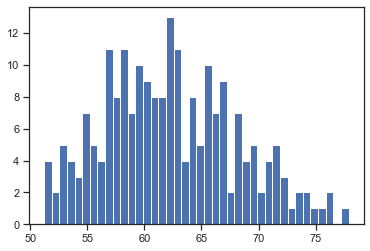

In [33]:
plt.hist(dat['mba_p'], 40)
plt.show()

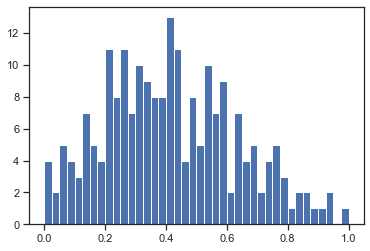

In [34]:
plt.hist(sc1_data, 40)
plt.show()

In [35]:
sc2 = Normalizer()
sc2_data = sc2.fit_transform(dat[['mba_p']])

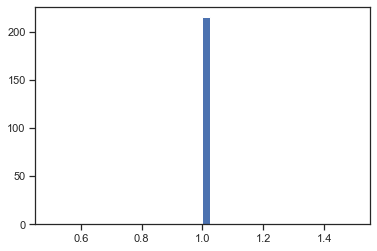

In [36]:
plt.hist(sc2_data, 40)
plt.show()